In [314]:
import nbsetup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from models.load import load
from observations import milky_circular_velocity as mcv

In [257]:
nsim = load('milky_slice')
nsim.rotate('x','z')

In [315]:
mass_components = ['buldge', 'thick', 'thin']

def vkms(arr, r):
    return (np.abs(r*arr)**0.5)/1000

def plot_velocities(self, dimension=0, xlim=(0,None), ylim=(None,None), components=False):
    plots = self.fields
    stack = self.space.center[0]
    row = self.space.center[1]
    r = self.space.x
    
    fig, axes = plt.subplots(2, 1, figsize=(20,20))
    refs = axes[1]
    vels = axes[0]
    
    if components:
        for mi, results in plots.items():
            sns.lineplot(x=r, y=vkms(results[dimension][stack][row], r), label=mi, ax=vels)
    
    
    # attempts
    gx = self.sums[dimension][stack][row]
    aa = self.sums['F'][stack][row]
    ax = self.sums['a%s' % dimension][stack][row]
    ex = ax-gx
    
    trials = {
        'ex': (1-(ex/gx)**0.15)
    }
    

    
    # references
    for key, arr in trials.items():
        sns.lineplot(x=r, y=arr, label=key, ax=refs).set(xlim=xlim, ylim=ylim)
    
    # trials plot
    sns.lineplot(x=r, y=vkms(gx,r), label='gx', ax=vels)
    
    for key, arr in trials.items():
        sns.lineplot(x=r, y=vkms(gx*arr,r), label=key, ax=vels)
    
    # actual measures
    sns.scatterplot(x=mcv.radius, y=mcv.velocity, ax=vels).set(xlim=xlim, ylim=ylim)
    

/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_11464/1887885244.py:28: RuntimeWarning: invalid value encountered in true_divide
  'ex': (1-(ex/gx)**0.15)


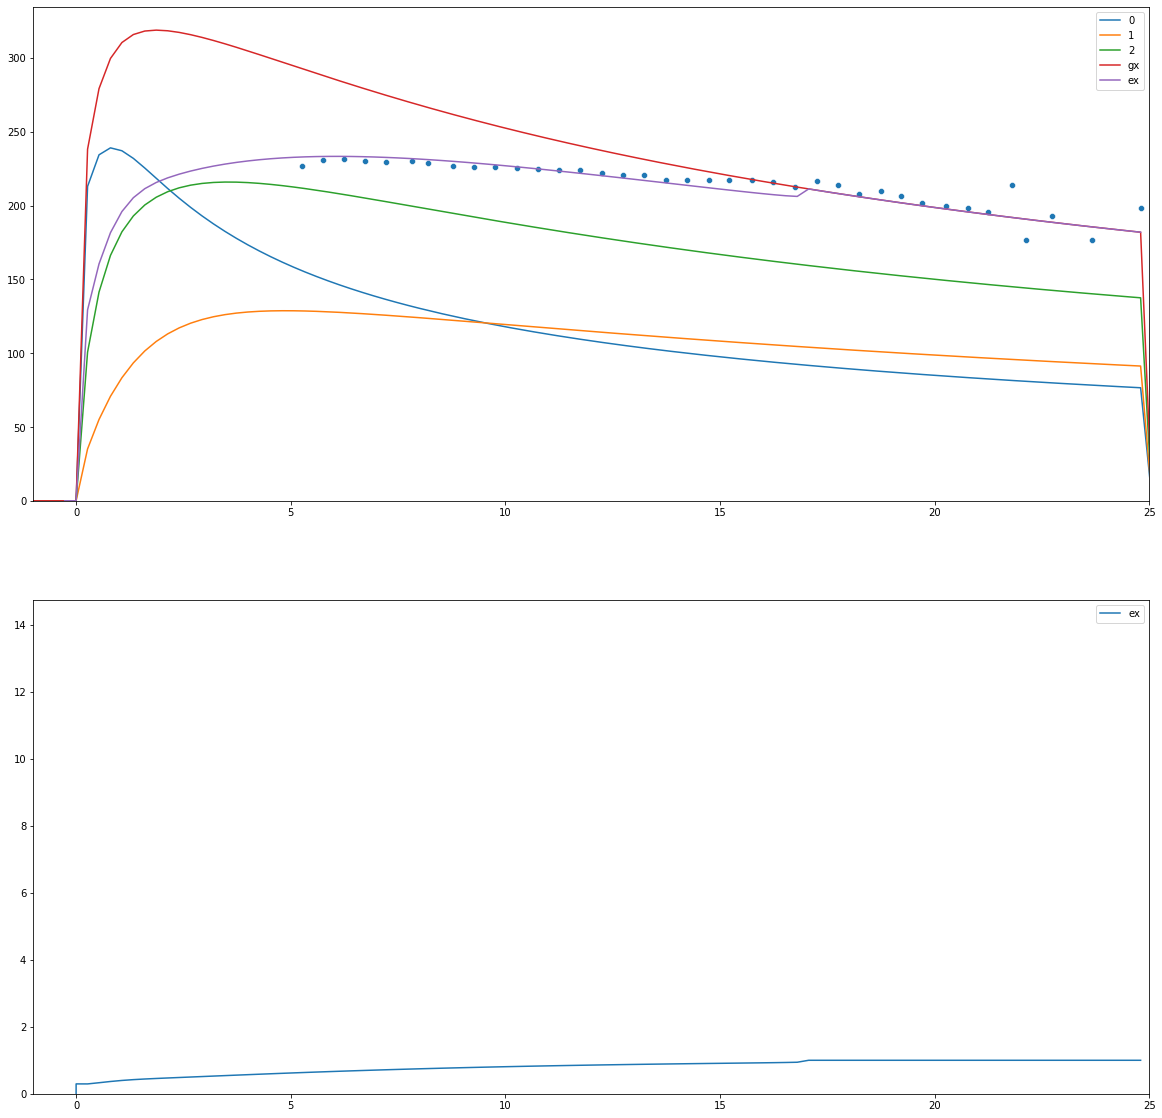

In [316]:
plot_velocities(nsim, dimension=0, xlim=(-1,25), ylim=(0,None), components=True)